In [1]:
# In this Notebook there is an Implementation
# of three Clustering Algorithms (K-Mean, K-Mode and K-Mediod) 
# using built in library(sklearn) functions
# Data Sets 
# Path.csv
# Artificial.csv
# Spiral.csv

In [2]:
# Importing important libraries in Python
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score,rand_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics.cluster import rand_score
import random
import json

In [4]:
# this ftn would just load the provided data set as pandas frame
# return the data with actual labels in X and y respectively
def load_dataset(filepath):
    # loading Data as pandas frame
    X = pd.read_csv(filepath)
    y = X.iloc[:,2]     #actual values/ labels
    return X,y          

In [5]:
# Path data set
X_path,y_path=load_dataset('/home/usman/Data_Sets/Path.csv')
print('Path Data Set')
X_path.head()

Path Data Set


,11.25,5.05,1
0,10.95,4.70,1
1,9.85,5.80,1
2,9.80,5.75,1
3,9.15,6.80,1
4,8.65,6.60,1


In [6]:
# Artificial data set
X_artf,y_artf=load_dataset('/home/usman/Data_Sets/Artificial.csv')
print('Artificial Data Set')
X_artf.head()

Artificial Data Set


,8.04731,-4.88662,0
0,11.23750,3.017460,0
1,5.11050,0.269883,0
2,6.34456,-3.718320,0
3,9.09493,2.028360,0
4,8.01686,-2.264840,0


In [7]:
# Spiral data set
X_spir,y_spir=load_dataset('/home/usman/Data_Sets/Spiral.csv')
print('Spiral Data Set')
X_spir.head()

Spiral Data Set


,31.95,7.95,3
0,31.15,7.30,3
1,30.45,6.65,3
2,29.70,6.00,3
3,28.90,5.55,3
4,28.05,5.00,3


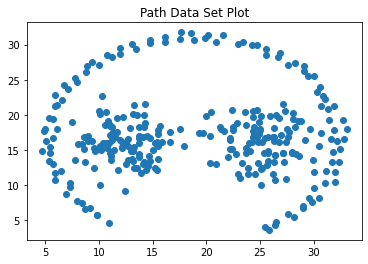

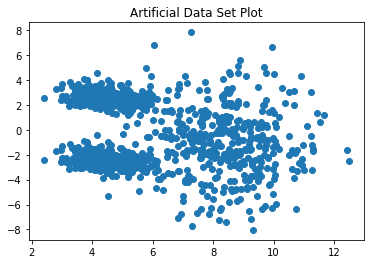

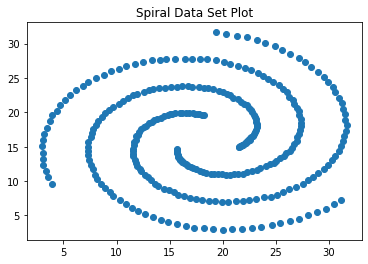

In [8]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
# display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
# plotting the original data using Matplot lib 

plt.title('Path Data Set Plot')
plt.scatter(X_path.iloc[:,0], X_path.iloc[:,1])
plt.show()


# plt.subplot(1,2,2)
plt.title('Artificial Data Set Plot')
plt.scatter(X_artf.iloc[:,0], X_artf.iloc[:,1])
plt.show()

plt.title('Spiral Data Set Plot')
plt.scatter(X_spir.iloc[:,0], X_spir.iloc[:,1])
plt.show()

# K Mean

In [9]:
# to Choose the right number of clusters / optimal value for K used Elbow Method
# if we didn't know about the centers, then we could use Elbow Method 
# it works fine in some of the cases. to determine the correct number of clusters.
# In this cell i have visualize the relationship between the number of clusters and 
# Within Cluster Sum of Squares (WCSS) then we select the number
# of clusters where the change in WCSS begins to level off i.e 3/4 in our case

def elbow_method_kmean(X,title):
    
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method for '+title)
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

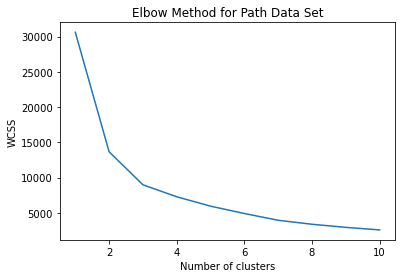

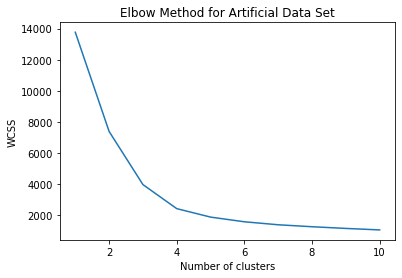

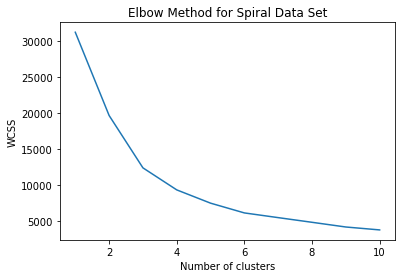

In [10]:
elbow_method_kmean(X_path,'Path Data Set')
elbow_method_kmean(X_artf,'Artificial Data Set')
elbow_method_kmean(X_spir,'Spiral Data Set')

In [11]:
# We can see a major bend at K=3 in all of the above graphs indicating 3 is the optimal number of clusters.
K=3

In [12]:
# this function is used to implement k means on using sklearn library
def kmean_sklearn(K,X,label):
    # k-means++ ensures that you get don’t fall into the random initialization trap.
    kmeans = KMeans(n_clusters=K, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(X)

    for i in range(K):
        plt.scatter(X.iloc[pred_y==i,0], X.iloc[pred_y==i,1], s = 100, label = 'C'+str(i+1))
        
        
    plt.title(label+' Data Set Clusters Using K Mean')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red',label = 'Centroids')
    plt.legend()
    plt.show()
    return kmeans.cluster_centers_,pred_y

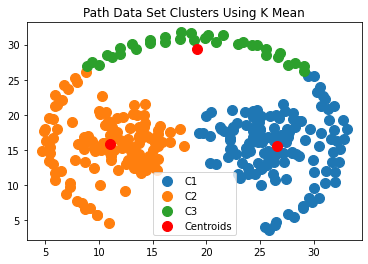

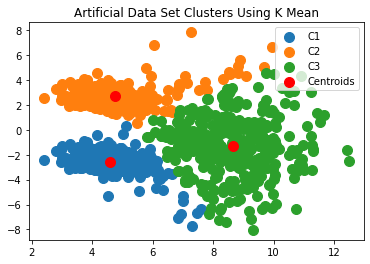

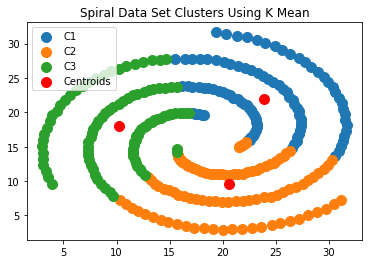

In [13]:
center_path,ykmean_path = kmean_sklearn(K,X_path,'Path')
center_artf,ykmean_artf = kmean_sklearn(K,X_artf,'Artificial')
center_spir,ykmean_spir = kmean_sklearn(K,X_spir,'Spiral')

# K Mode

In [14]:
# Elbow curve to find optimal K in case of K-Mode
def elbow_method_kmode(X,title):
    cost = []
    k_list = range(1,11)
    for i in list(k_list):
        kmode = KModes(n_clusters=i, init = "random", n_init = 5, verbose=1)
        kmode.fit_predict(X)
        cost.append(kmode.cost_)

    plt.plot(k_list, cost, 'bx-')
    plt.xlabel('No. of clusters')
    plt.ylabel('Cost')
    plt.title('Elbow Method For Optimal k '+title)
    plt.show()


In [15]:
# We can see a bend at K=3 in the above graph indicating 3 is the optimal number of clusters.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 778.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 778.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 677.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 776.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, it

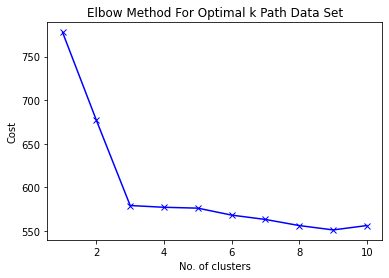

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2598.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2598.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2598.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2598.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2598.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2303.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2303.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Ru

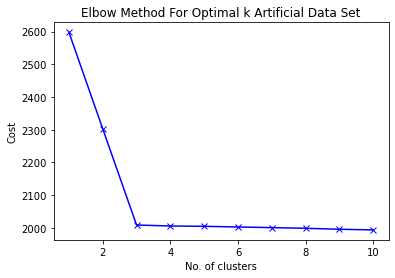

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 818.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 818.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 818.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 818.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 818.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 708.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 104, cost: 704.0
Run 2, iteration: 2/100, moves: 0, cost: 704.0
Init: initializing centroids
Init: initi

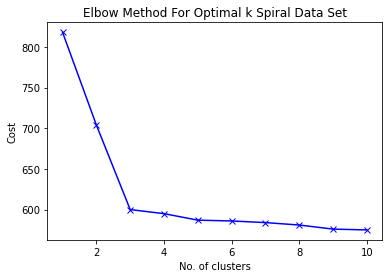

In [16]:
elbow_method_kmode(X_path,'Path Data Set')
elbow_method_kmode(X_artf,'Artificial Data Set')
elbow_method_kmode(X_spir,'Spiral Data Set')

In [17]:

def kmode_sklearn(K,X,label='Default'):
    
    kmode = KModes(n_clusters=K, init = "random", n_init = 10, verbose=1)
    pred_y = kmode.fit_predict(X)

    for i in range(K):
        plt.scatter(X.iloc[pred_y==i,0], X.iloc[pred_y==i,1], s = 100, label = 'C'+str(i+1))
    plt.title(label+' Data Set Clusters Using K Mode')
    plt.legend()
    plt.show()
    return pred_y

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 675.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 87, cost: 585.0
Run 2, iteration: 2/100, moves: 0, cost: 585.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 83, cost: 582.0
Run 3, iteration: 2/100, moves: 0, cost: 582.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 673.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 675.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 673.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 579.0
Init: initializ

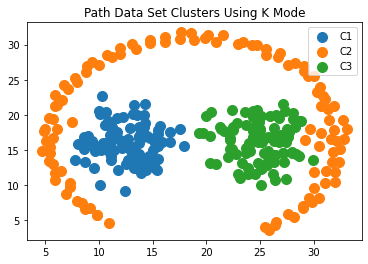

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 2300.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2009.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2009.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2, cost: 2302.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2009.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 3, cost: 2299.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 2, cost: 2302.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100,

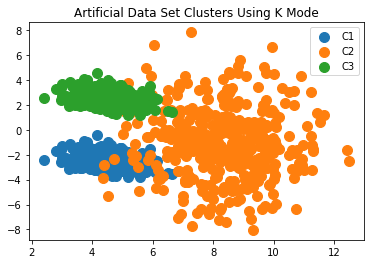

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 702.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 704.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 89, cost: 712.0
Run 3, iteration: 2/100, moves: 1, cost: 712.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 703.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2, cost: 597.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 1, cost: 597.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 195, cost: 606.0
Run 7, iteration: 2/100, moves: 0, cost: 606.0
Init: initiali

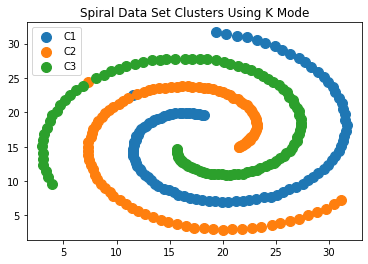

In [18]:
ykmode_path = kmode_sklearn(K,X_path,'Path')
ykmode_artf = kmode_sklearn(K,X_artf,'Artificial')
ykmode_spir = kmode_sklearn(K,X_spir,'Spiral')

# K Mediod

In [19]:
# Installing sklearn Extra
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

  Using cached https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [20]:
# Scaling and Fitting KMedoids
def kmediod_sklearn(K,X,label='Default'):
    scaler = StandardScaler().fit(X)
    x_scaled = scaler.transform(X)    
    
    kmedoids = KMedoids(n_clusters = K, random_state = 0)
    kmedoids.fit(x_scaled)
#     print(kmedoids.inertia_)
    y_kmed = kmedoids.fit_predict(x_scaled)
    
    # plotting the data with appropriate clusters assigned to data
    for i in range(K):
        plt.scatter(x_scaled[y_kmed == i, 0], x_scaled[y_kmed == i, 1], s = 100, label = 'C'+str(i+1))

    plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
    plt.title(label+' Data Set Clusters Using K Mediod')
    plt.legend()
    plt.show()
    return y_kmed,x_scaled

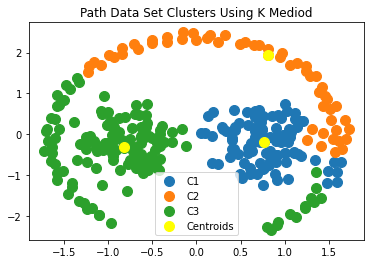

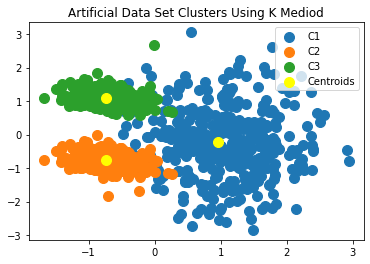

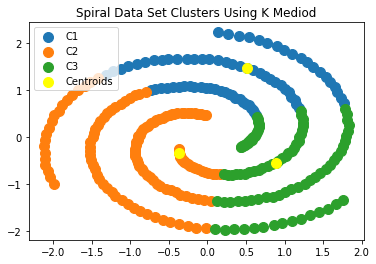

In [21]:
ykmed_path,x_scaled_path = kmediod_sklearn(K,X_path,'Path')
ykmed_artf,x_scaled_artf = kmediod_sklearn(K,X_artf,'Artificial')
ykmed_spir,x_scaled_spir = kmediod_sklearn(K,X_spir,'Spiral')

# Evaluations Metrics
Uses the following Methods for Evaluations

1. Silhouette Coefficient
2. Purity
3. Rand Index
4. Calinski-Harabasz Index
5. Davies-Bouldin Index 

In [22]:
# Creating Nested Dictionaries for tracking the records of different Evaluations
eval_kmean   = {'path':{},'artf':{},'spir':{}}
eval_kmode   = {'path':{},'artf':{},'spir':{}}
eval_kmediod = {'path':{},'artf':{},'spir':{}}

In [23]:
# 1.Silhouette Coefficient:
# Silhouette Coefficient is bounded between -1 for incorrect clustering and +1 for highly dense clustering. 
# Scores around zero indicate overlapping clusters. The score is higher when clusters are dense 
# and well separated, which relates to a standard concept of a cluster.

def sihouette_calc(X,y_pred):
    silhouette_avg = silhouette_score(X, y_pred)
#     print(silhouette_avg)
    return silhouette_avg

In [24]:
eval_kmean['path']['sihouette']   = sihouette_calc(X_path,ykmean_path)
eval_kmode['path']['sihouette']   = sihouette_calc(X_path,ykmode_path)
eval_kmediod['path']['sihouette'] = sihouette_calc(x_scaled_path,ykmed_path)

eval_kmean['artf']['sihouette']   = sihouette_calc(X_artf,ykmean_artf)
eval_kmode['artf']['sihouette']   = sihouette_calc(X_artf,ykmode_artf)
eval_kmediod['artf']['sihouette'] = sihouette_calc(x_scaled_artf,ykmed_artf)

eval_kmean['spir']['sihouette']   = sihouette_calc(X_spir,ykmean_spir)
eval_kmode['spir']['sihouette']   = sihouette_calc(X_spir,ykmode_spir)
eval_kmediod['spir']['sihouette'] = sihouette_calc(x_scaled_spir,ykmed_spir)

In [25]:
# 2.Computing Purity Score

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
#     print(np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix))
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [26]:
eval_kmean['path']['purity']   = purity_score(y_path,ykmean_path)
eval_kmode['path']['purity']   = purity_score(y_path,ykmode_path)
eval_kmediod['path']['purity'] = purity_score(y_path,ykmed_path)

eval_kmean['artf']['purity']   = purity_score(y_artf,ykmean_artf)
eval_kmode['artf']['purity']   = purity_score(y_artf,ykmode_artf)
eval_kmediod['artf']['purity'] = purity_score(y_artf,ykmed_artf)

eval_kmean['spir']['purity']   = purity_score(y_spir,ykmean_spir)
eval_kmode['spir']['purity']   = purity_score(y_spir,ykmode_spir)
eval_kmediod['spir']['purity'] = purity_score(y_spir,ykmed_spir)

In [27]:
# 3.Rand Index
# It computes a similarity measure between two clusters by considering all 
# pairs of samples and counting pairs that are assigned in the same or different 
# clusters in the predicted and true clusterings.
# The RI can range from zero to 1, a perfect match.

In [28]:
def rand_index(y_true,y_pred):
    from sklearn.metrics.cluster import rand_score
    rand_score = rand_score(y_true, y_pred)
#     print(rand_score)
    return rand_score

In [29]:
eval_kmean['path']['rand_index']   = rand_index(y_path,ykmean_path)
eval_kmode['path']['rand_index']   = rand_index(y_path,ykmode_path)
eval_kmediod['path']['rand_index'] = rand_index(y_path,ykmed_path)


eval_kmean['artf']['rand_index']   = rand_index(y_artf,ykmean_artf)
eval_kmode['artf']['rand_index']   = rand_index(y_artf,ykmode_artf)
eval_kmediod['artf']['rand_index'] = rand_index(y_artf,ykmed_artf)

eval_kmean['spir']['rand_index']   = rand_index(y_spir,ykmean_spir)
eval_kmode['spir']['rand_index']   = rand_index(y_spir,ykmode_spir)
eval_kmediod['spir']['rand_index'] = rand_index(y_spir,ykmed_spir)

In [30]:
# 4.Calinski-Harabasz Index
# The score is defined as the ratio between the within-cluster dispersion and the 
# between-cluster dispersion. 
# The C-H Index is a great way to evaluate the performance of a Clustering algorithm as it does 
# not require information on the ground truth labels.
# The higher the Index, the better the performance.


In [31]:
def calinski_score(X,y_pred):
    from sklearn.metrics.cluster import calinski_harabasz_score
    ch_index = calinski_harabasz_score(X, y_pred)
#     print(ch_index)
    return ch_index

In [32]:
eval_kmean['path']['calinski_score']   = calinski_score(X_path,ykmean_path)
eval_kmode['path']['calinski_score']   = calinski_score(X_path,ykmode_path)
eval_kmediod['path']['calinski_score'] = calinski_score(x_scaled_path,ykmed_path)


eval_kmean['artf']['calinski_score']   = calinski_score(X_artf,ykmean_artf)
eval_kmode['artf']['calinski_score']   = calinski_score(X_artf,ykmode_artf)
eval_kmediod['artf']['calinski_score'] = calinski_score(x_scaled_artf,ykmed_artf)

eval_kmean['spir']['calinski_score']   = calinski_score(X_spir,ykmean_spir)
eval_kmode['spir']['calinski_score']   = calinski_score(X_spir,ykmode_spir)
eval_kmediod['spir']['calinski_score'] = calinski_score(x_scaled_spir,ykmed_spir)

In [33]:
# 5.Davies-Bouldin Index
# The minimum score is zero, and differently from most performance metrics, 
# the lower values the better clustering performance.

In [34]:
def davies_score(X,y_pred):
    
    from sklearn.metrics.cluster import davies_bouldin_score
    db_index = davies_bouldin_score(X, y_pred)
#     print(db_index)
    return db_index

In [35]:
eval_kmean['path']['davies_score']   = davies_score(X_path,ykmean_path)
eval_kmode['path']['davies_score']   = davies_score(X_path,ykmode_path)
eval_kmediod['path']['davies_score'] = davies_score(x_scaled_path,ykmed_path)


eval_kmean['artf']['davies_score']   = davies_score(X_artf,ykmean_artf)
eval_kmode['artf']['davies_score']   = davies_score(X_artf,ykmode_artf)
eval_kmediod['artf']['davies_score'] = davies_score(x_scaled_artf,ykmed_artf)

eval_kmean['spir']['davies_score']   = davies_score(X_spir,ykmean_spir)
eval_kmode['spir']['davies_score']   = davies_score(X_spir,ykmode_spir)
eval_kmediod['spir']['davies_score'] = davies_score(x_scaled_spir,ykmed_spir)

In [36]:
# scaling down the calinski_score by dividing 150 scalar values so that the graph could be visualized properly
eval_kmean['path']['calinski_score']   = eval_kmean['path']['calinski_score']/150
eval_kmode['path']['calinski_score']   = eval_kmode['path']['calinski_score']/150   
eval_kmediod['path']['calinski_score'] = eval_kmediod['path']['calinski_score']/150 

eval_kmean['artf']['calinski_score']   = eval_kmean['artf']['calinski_score']/150
eval_kmode['artf']['calinski_score']   = eval_kmode['artf']['calinski_score']/150   
eval_kmediod['artf']['calinski_score'] = eval_kmediod['artf']['calinski_score']/150 

eval_kmean['spir']['calinski_score']   = eval_kmean['spir']['calinski_score']/150
eval_kmode['spir']['calinski_score']   = eval_kmode['spir']['calinski_score']/150   
eval_kmediod['spir']['calinski_score'] = eval_kmediod['spir']['calinski_score']/150 

In [37]:

# reading evaluations got using K mean without library function in another notebook
with open('convert.txt') as f:
    data = f.read()


# reconstructing the data as a dictionary
w_eval = json.loads(data)

w_eval

{'path': {'sihouette': 0.5420275543619765,
  'purity': 0.7433333333333333,
  'rand_index': 0.7477814938684504,
  'calinski_score': 0.01595704857846857,
  'davies_score': 0.6662412952246745},
 'artf': {'sihouette': 0.5492679494658761,
  'rand_index': 0.8593255934683091,
  'calinski_score': 0.05641706432730371,
  'davies_score': 0.6986488218381682,
  'purity': 0.8870168483647175},
 'spir': {'sihouette': 0.36141515270397445,
  'rand_index': 0.5541058619836755,
  'calinski_score': 0.010556675439449131,
  'davies_score': 0.8892926294746718,
  'purity': 0.34615384615384615}}

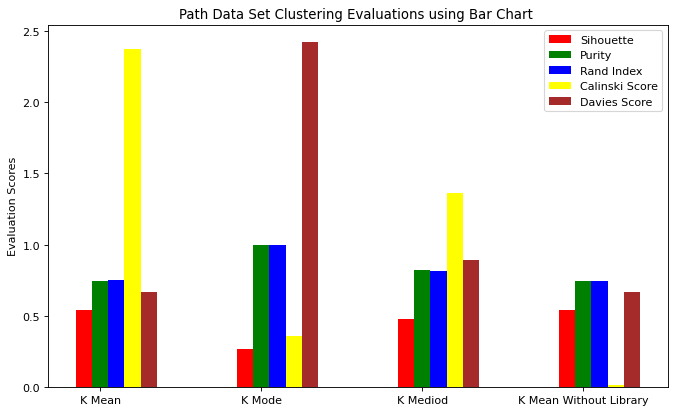

In [41]:
# Path Data Set Evaluation Bar Chart
N = 4
ind = np.arange(N)
width = 0.1

avals = []
avals.append(eval_kmean['path']['sihouette'])
avals.append(eval_kmode['path']['sihouette'])
avals.append(eval_kmediod['path']['sihouette'])
avals.append(w_eval['path']['sihouette'])

bar1 = plt.bar(ind, avals, width, color = 'r')

bvals = []
bvals.append(eval_kmean['path']['purity'])
bvals.append(eval_kmode['path']['purity'])
bvals.append(eval_kmediod['path']['purity'])
bvals.append(w_eval['path']['purity'])


bar2 = plt.bar(ind+width, bvals, width, color='g')

cvals = []
cvals.append(eval_kmean['path']['rand_index'])
cvals.append(eval_kmode['path']['rand_index'])
cvals.append(eval_kmediod['path']['rand_index'])
cvals.append(w_eval['path']['rand_index'])

bar3 = plt.bar(ind+width*2, cvals, width, color = 'b')

dvals = []
dvals.append(eval_kmean['path']['calinski_score'])
dvals.append(eval_kmode['path']['calinski_score'])
dvals.append(eval_kmediod['path']['calinski_score'])
dvals.append(w_eval['path']['calinski_score'])

bar4 = plt.bar(ind+width*3, dvals, width, color = 'yellow')

evals = []
evals.append(eval_kmean['path']['davies_score'])
evals.append(eval_kmode['path']['davies_score'])
evals.append(eval_kmediod['path']['davies_score'])
evals.append(w_eval['path']['davies_score'])

bar5 = plt.bar(ind+width*4, evals, width, color = 'brown')


# plt.xlabel("Algorithms")
plt.ylabel('Evaluation Scores')
plt.title("Path Data Set Clustering Evaluations using Bar Chart ")

plt.xticks(ind+width,['K Mean', 'K Mode', 'K Mediod','K Mean Without Library'])
plt.legend((bar1, bar2, bar3,bar4,bar5), ('Sihouette', 'Purity', 'Rand Index','Calinski Score','Davies Score') )
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':80})
plt.show()


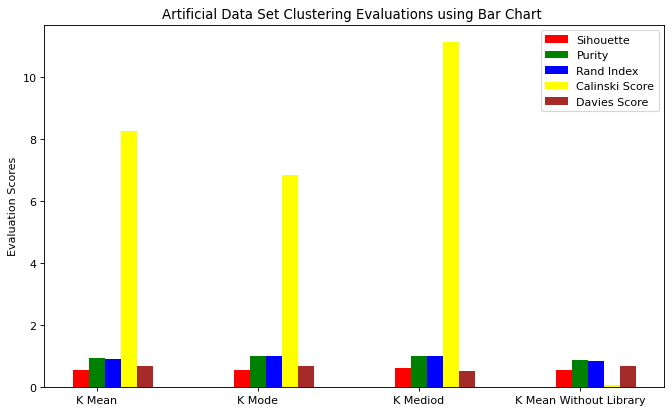

In [43]:
# Artificial Data Set Evaluation Bar Chart
N = 4
ind = np.arange(N)
width = 0.1

avals = []
avals.append(eval_kmean['artf']['sihouette'])
avals.append(eval_kmode['artf']['sihouette'])
avals.append(eval_kmediod['artf']['sihouette'])
avals.append(w_eval['artf']['sihouette'])

bar1 = plt.bar(ind, avals, width, color = 'r')

bvals = []
bvals.append(eval_kmean['artf']['purity'])
bvals.append(eval_kmode['artf']['purity'])
bvals.append(eval_kmediod['artf']['purity'])
bvals.append(w_eval['artf']['purity'])


bar2 = plt.bar(ind+width, bvals, width, color='g')

cvals = []
cvals.append(eval_kmean['artf']['rand_index'])
cvals.append(eval_kmode['artf']['rand_index'])
cvals.append(eval_kmediod['artf']['rand_index'])
cvals.append(w_eval['artf']['rand_index'])

bar3 = plt.bar(ind+width*2, cvals, width, color = 'b')

dvals = []
dvals.append(eval_kmean['artf']['calinski_score'])
dvals.append(eval_kmode['artf']['calinski_score'])
dvals.append(eval_kmediod['artf']['calinski_score'])
dvals.append(w_eval['artf']['calinski_score'])

bar4 = plt.bar(ind+width*3, dvals, width, color = 'yellow')

evals = []
evals.append(eval_kmean['artf']['davies_score'])
evals.append(eval_kmode['artf']['davies_score'])
evals.append(eval_kmediod['artf']['davies_score'])
evals.append(w_eval['artf']['davies_score'])

bar5 = plt.bar(ind+width*4, evals, width, color = 'brown')


# plt.xlabel("Algorithms")
plt.ylabel('Evaluation Scores')
plt.title("Artificial Data Set Clustering Evaluations using Bar Chart ")


plt.xticks(ind+width,['K Mean', 'K Mode', 'K Mediod','K Mean Without Library'])
plt.legend((bar1, bar2, bar3,bar4,bar5), ('Sihouette', 'Purity', 'Rand Index','Calinski Score','Davies Score') )
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':80})
plt.show()


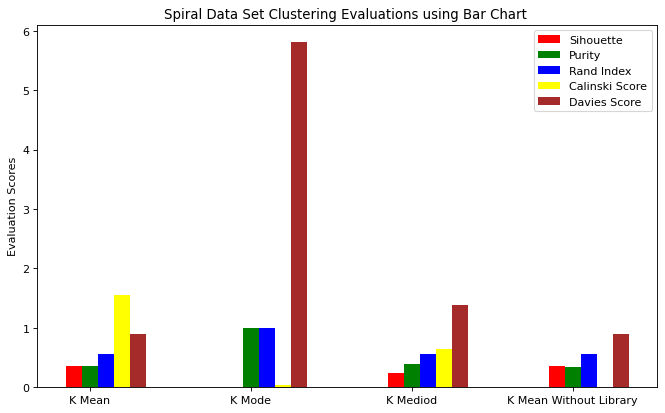

In [40]:
# Spiral Data Set Evaluation Bar Chart
N = 4
ind = np.arange(N)
width = 0.1

avals = []
avals.append(eval_kmean['spir']['sihouette'])
avals.append(eval_kmode['spir']['sihouette'])
avals.append(eval_kmediod['spir']['sihouette'])
avals.append(w_eval['spir']['sihouette'])

bar1 = plt.bar(ind, avals, width, color = 'r')

bvals = []
bvals.append(eval_kmean['spir']['purity'])
bvals.append(eval_kmode['spir']['purity'])
bvals.append(eval_kmediod['spir']['purity'])
bvals.append(w_eval['spir']['purity'])


bar2 = plt.bar(ind+width, bvals, width, color='g')

cvals = []
cvals.append(eval_kmean['spir']['rand_index'])
cvals.append(eval_kmode['spir']['rand_index'])
cvals.append(eval_kmediod['spir']['rand_index'])
cvals.append(w_eval['spir']['rand_index'])

bar3 = plt.bar(ind+width*2, cvals, width, color = 'b')

dvals = []
dvals.append(eval_kmean['spir']['calinski_score'])
dvals.append(eval_kmode['spir']['calinski_score'])
dvals.append(eval_kmediod['spir']['calinski_score'])
dvals.append(w_eval['spir']['calinski_score'])

bar4 = plt.bar(ind+width*3, dvals, width, color = 'yellow')

evals = []
evals.append(eval_kmean['spir']['davies_score'])
evals.append(eval_kmode['spir']['davies_score'])
evals.append(eval_kmediod['spir']['davies_score'])
evals.append(w_eval['spir']['davies_score'])

bar5 = plt.bar(ind+width*4, evals, width, color = 'brown')


# plt.xlabel("Algorithms")
plt.ylabel('Evaluation Scores')
plt.title("Spiral Data Set Clustering Evaluations using Bar Chart ")



plt.xticks(ind+width,['K Mean', 'K Mode', 'K Mediod','K Mean Without Library'])
plt.legend((bar1, bar2, bar3,bar4,bar5), ('Sihouette', 'Purity', 'Rand Index','Calinski Score','Davies Score') )
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':80})
plt.show()


In [48]:
eval_kmediod

{'path': {'sihouette': 0.479262149547105,
  'purity': 0.822742474916388,
  'rand_index': 0.8121927678391058,
  'calinski_score': 1.3627150656615774,
  'davies_score': 0.8946031887902232},
 'artf': {'sihouette': 0.621183442371943,
  'purity': 0.9940476190476191,
  'rand_index': 0.9916201667691241,
  'calinski_score': 11.135531590084328,
  'davies_score': 0.5322085412775556},
 'spir': {'sihouette': 0.23832972009069942,
  'purity': 0.39228295819935693,
  'rand_index': 0.5516855098018878,
  'calinski_score': 0.6502060708239539,
  'davies_score': 1.3828544796908826}}